In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm

In [2]:
df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/brainhead.dat',names=['gender','age','brain_volume','brain_weight'],delimiter=r"\s+")
df

,gender,age,brain_volume,brain_weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


plot weight per volume

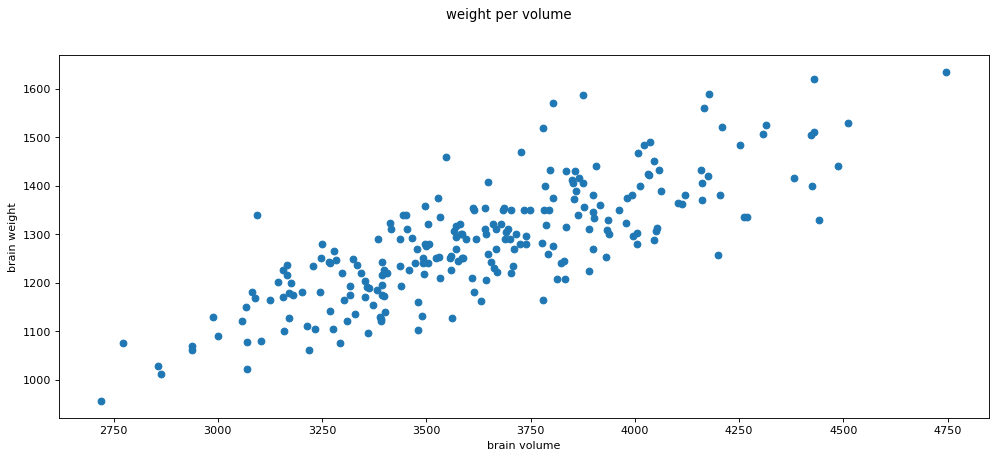

In [3]:
fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('weight per volume')
plt.plot(df['brain_volume'], df['brain_weight'],'o')
plt.xlabel('brain volume', fontsize=10)
plt.ylabel('brain weight', fontsize=10)
plt.show()

learn here

In [8]:
headbrain = df.values
X = headbrain[:,2]
Y = headbrain[:,3]

In [9]:
X = X.reshape(len(X),1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test)

print("R-squared :",r2_score(y_test, y_predictions))

R-squared : 0.5710061741282964


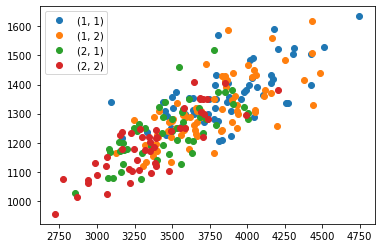

In [15]:
groups = df.groupby(['gender','age'])
for name, group in groups:
     plt.plot(group["brain_volume"], group["brain_weight"], marker="o", linestyle="", label=name)
plt.legend()

learn groups

In [63]:
def frac(df, fraction):
    return df.sample(frac=fraction)
train = frac(df, 0.8)
test = df.merge(train, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
train = train.reset_index()
for i in range(len(train)):
    if train.iloc[i,1]==1:
        if train.iloc[i,2]==1:
            train.loc[i,'group'] = 1
        else:
            train.loc[i,'group'] = 2
    elif train.iloc[i,1]==2:
        if train.iloc[i,2]==1:
            train.loc[i,'group'] = 3
        else:
            train.loc[i,'group'] = 4
test = test.reset_index()
for i in range(len(test)):
    if test.iloc[i,1]==1:
        if test.iloc[i,2]==1:
            test.loc[i,'group'] = 1
        else:
            test.loc[i,'group'] = 2
    elif test.iloc[i,1]==2:
        if test.iloc[i,2]==1:
            test.loc[i,'group'] = 3
        else:
            test.loc[i,'group'] = 4
x = train.iloc[:,2:4]
y = train.group
train

,index,gender,age,brain_volume,brain_weight,group
0,194,2,2,3556,1250,4.0
1,134,2,1,2857,1027,3.0
2,86,1,2,3309,1120,2.0
3,80,1,2,3830,1245,2.0
4,222,2,2,3740,1280,4.0
...,...,...,...,...,...,...
185,50,1,1,3891,1224,1.0
186,17,1,1,3466,1292,1.0
187,51,1,1,3793,1350,1.0
188,216,2,2,3246,1180,4.0


In [64]:
clf = svm.SVC()
clf.fit(x, y)

SVC()

In [65]:
my_result = clf.predict(test.iloc[:,:2])

In [67]:
counter = 0
intersection = []
ans = test.group
for i in range(len(ans)):
    if my_result[i] == ans[i]:
        intersection.append(ans[i])
        counter += 1
print((counter/len(ans))*100)

21.27659574468085
